## Olympic Athletes Analysis

#### Omar Abdelgawad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

##### What is the Height distribution of 2016 Gold-Winning Athletes for each sport? A good way to display this would be a violin plot

In [2]:
df = pd.read_csv("olympic_athletes.csv")
df_gold = df[df["Medal"] == "Gold"]

In [3]:
df16 = df_gold[df_gold["Year"] == 2016][["Sport", "Height"]]
sports = ["Swimming", "Wrestling", "Fencing", "Athletics", "Shooting", "Cycling", "Rowing", "Gymnastics"]
df_interm = df16[df16["Sport"] == "Swimming"].append(df16[df16["Sport"] == "Wrestling"] ).append(df16[df16["Sport"] == "Fencing"]).append(df16[df16["Sport"] == "Athletics"])
df1 = df_interm.append(df16[df16["Sport"] == "Shooting"]).append(df16[df16["Sport"] == "Cycling"]).append(df16[df16["Sport"] == "Rowing"]).append(df16[df16["Sport"] == "Gymnastics"] )

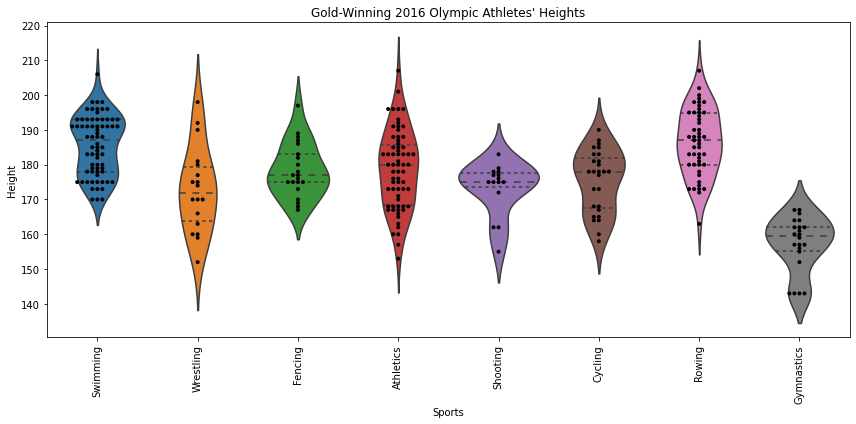

In [4]:
fig, ax = plt.subplots(figsize= (12,6))
sns.swarmplot(x=df1["Sport"], y= df1["Height"],color="black", ax = ax, size= 4)
sns.violinplot(x=df1["Sport"], y= df1["Height"], ax = ax, inner="quartile")
plt.xticks(rotation=90)
plt.yticks([140,150,160,170,180,190,200,210,220])
plt.title("Gold-Winning 2016 Olympic Athletes' Heights")
plt.xlabel("Sports")
plt.ylabel("Height")
plt.tight_layout()

##### Let's generate a heatmap of the height-weight distribution of athletes based on sport. 

In [5]:
# get the years needed
df2 = df_gold[df_gold["Year"] == 2000].append(df_gold[df_gold["Year"] == 2001]).append(df_gold[df_gold["Year"] == 2002]).append(df_gold[df_gold["Year"] == 2003]).append(df_gold[df_gold["Year"] == 2004]).append(df_gold[df_gold["Year"] == 2005]).append(df_gold[df_gold["Year"] == 2006]).append(df_gold[df_gold["Year"] == 2007]).append(df_gold[df_gold["Year"] == 2008]).append(df_gold[df_gold["Year"] == 2009]).append(df_gold[df_gold["Year"] == 2010]).append(df_gold[df_gold["Year"] == 2011]).append(df_gold[df_gold["Year"] == 2012]).append(df_gold[df_gold["Year"] == 2013]).append(df_gold[df_gold["Year"] == 2014]).append(df_gold[df_gold["Year"] == 2015]).append(df_gold[df_gold["Year"] == 2016])[["Height", "Weight", "Sex", "Sport"]]
df21 = df2.reset_index(drop=True)
df22 = df21[["Sport","Height","Weight","Sex"]]
# get the sports needed
df23 = df22[df22["Sport"] == "Wrestling"].append(df22[df22["Sport"] == "Fencing"]).append(df22[df22["Sport"] == "Athletics"]).append(df22[df22["Sport"] == "Shooting"]).append(df22[df22["Sport"] == "Cycling"]).append(df22[df22["Sport"] == "Rowing"]).append(df22[df22["Sport"] == "Gymnastics"] ).append(df22[df22["Sport"] == "Swimming"] )
#df23["Weight_Group"] = pd.cut(x= df23["Weight"],bins= [25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140])
#df23["Height_Group"] = pd.cut(x= df23["Height"],bins= [130,135,140,145,150,155,160,165,170,175,180,185,190,195,200,205,210,215,220])
df23["weight"] = df23["Weight"].round(-1) #round to nearest 10s
df23["height"] = df23["Height"].round(-1)

In [6]:
df_swim = df23[df23.Sport == "Swimming"].loc[:,"Height"::]
df_wres = df23[df23.Sport == "Wrestling"].loc[:,"Height"::]
df_fence = df23[df23.Sport == "Fencing"].loc[:,"Height"::]
df_athlet = df23[df23.Sport == "Athletics"].loc[:,"Height"::]
df_shoot = df23[df23.Sport == "Shooting"].loc[:,"Height"::]
df_cycle = df23[df23.Sport == "Cycling"].loc[:,"Height"::]
df_row = df23[df23.Sport == "Rowing"].loc[:,"Height"::]
df_gym = df23[df23.Sport == "Gymnastics"].loc[:,"Height"::]

In [7]:
def f(sport, kde = False, display_data= False):
    fig,ax= plt.subplots(figsize=(9,9))
    
    if(kde):
        if(sport == "Swimming"):
            sns.kdeplot(x="Weight", y="Height", data=df_swim, shade="fill", alpha= 0.7, ax = ax)
        if(sport == "Wrestling"):
            sns.kdeplot(x="Weight", y="Height", data=df_wres, shade="fill", alpha= 0.7, ax = ax)
        if(sport == "Fencing"):
            sns.kdeplot(x="Weight", y="Height", data=df_fence, shade="fill", alpha= 0.7, ax = ax)
        if(sport == "Athletics"):
            sns.kdeplot(x="Weight", y="Height", data=df_athlet, shade="fill", alpha= 0.7, ax = ax)
        if(sport == "Shooting"):
            sns.kdeplot(x="Weight", y="Height", data=df_shoot, shade="fill", alpha= 0.7, ax = ax)
        if(sport == "Cycling"):
            sns.kdeplot(x="Weight", y="Height", data=df_cycle, shade="fill", alpha= 0.7, ax = ax)
        if(sport == "Rowing"):
            sns.kdeplot(x="Weight", y="Height", data=df_row, shade="fill", alpha= 0.7, ax = ax)
        if(sport == "Gymnastics"):
            sns.kdeplot(x="Weight", y="Height", data=df_gym, shade="fill", alpha= 0.7, ax = ax)
        
    if(kde==False):
        if(sport == "Swimming"):
            sns.heatmap(df_swim[["weight","height","Sex"]].groupby(["weight","height"]).count().reset_index().pivot(index="height",columns="weight",values="Sex").sort_values(by='height', ascending = False), cbar=False, cmap="Greens", linewidths=[10], ax= ax, alpha=0.99)
        if(sport == "Wrestling"):
            sns.heatmap(df_wres[["weight","height","Sex"]].groupby(["height","weight"]).count().reset_index().pivot(index="height",columns="weight",values="Sex").sort_values(by='height', ascending = False), cbar=False, cmap="Greens", linewidths=[10], ax= ax, alpha=0.99)
        if(sport == "Fencing"):
            sns.heatmap(df_fence[["weight","height","Sex"]].groupby(["height","weight"]).count().reset_index().pivot(index="height",columns="weight",values="Sex").sort_values(by='height', ascending = False), cbar=False, cmap="Greens", linewidths=[10], ax= ax, alpha=0.99)
        if(sport == "Athletics"):
            sns.heatmap(df_athlet[["weight","height","Sex"]].groupby(["height","weight"]).count().reset_index().pivot(index="height",columns="weight",values="Sex").sort_values(by='height', ascending = False), cbar=False, cmap="Greens", linewidths=[10], ax= ax, alpha=0.99)
        if(sport == "Shooting"):
            sns.heatmap(df_shoot[["weight","height","Sex"]].groupby(["height","weight"]).count().reset_index().pivot(index="height",columns="weight",values="Sex").sort_values(by='height', ascending = False), cbar=False, cmap="Greens", linewidths=[10], ax= ax, alpha=0.99)
        if(sport == "Cycling"):
            sns.heatmap(df_cycle[["weight","height","Sex"]].groupby(["height","weight"]).count().reset_index().pivot(index="height",columns="weight",values="Sex").sort_values(by='height', ascending = False), cbar=False, cmap="Greens", linewidths=[10], ax= ax, alpha=0.99)
        if(sport == "Rowing"):
            sns.heatmap(df_row[["weight","height","Sex"]].groupby(["height","weight"]).count().reset_index().pivot(index="height",columns="weight",values="Sex").sort_values(by='height', ascending = False), cbar=False, cmap="Greens", linewidths=[10], ax= ax, alpha=0.99)
        if(sport == "Gymnastics"):
            sns.heatmap(df_gym[["weight","height","Sex"]].groupby(["height","weight"]).count().reset_index().pivot(index="height",columns="weight",values="Sex").sort_values(by='height', ascending = False), cbar=False, cmap="Greens", linewidths=[10], ax= ax, alpha=0.99)
        
    if(display_data):
        if(sport == "Swimming"):
            sns.scatterplot(x ="Weight", y = "Height", hue = "Sex", data=df_swim, legend=True, ax=ax, alpha= 0.8)
        if(sport == "Wrestling"):
            sns.scatterplot(x ="Weight", y = "Height", hue = "Sex", data=df_wres, legend=True, ax=ax, alpha= 0.8)
        if(sport == "Fencing"):
            sns.scatterplot(x ="Weight", y = "Height", hue = "Sex", data=df_fence, legend=True, ax=ax, alpha= 0.8)
        if(sport == "Athletics"):
            sns.scatterplot(x ="Weight", y = "Height", hue = "Sex", data=df_athlet, legend=True, ax=ax, alpha= 0.8)
        if(sport == "Shooting"):
            sns.scatterplot(x ="Weight", y = "Height", hue = "Sex", data=df_shoot, legend=True, ax=ax, alpha= 0.8)
        if(sport == "Cycling"):
            sns.scatterplot(x ="Weight", y = "Height", hue = "Sex", data=df_cycle, legend=True, ax=ax, alpha= 0.8)
        if(sport == "Rowing"):
            sns.scatterplot(x ="Weight", y = "Height", hue = "Sex", data=df_row, legend=True, ax=ax, alpha= 0.8)
        if(sport == "Gymnastics"):
            sns.scatterplot(x ="Weight", y = "Height", hue = "Sex", data=df_gym, legend=True, ax=ax, alpha= 0.8)

In [8]:
widgets.interact(f,sport = widgets.Dropdown(options=sports, description= "Sport:"))

interactive(children=(Dropdown(description='Sport:', options=('Swimming', 'Wrestling', 'Fencing', 'Athletics',…

<function __main__.f(sport, kde=False, display_data=False)>